## Why not linear regression for classification?

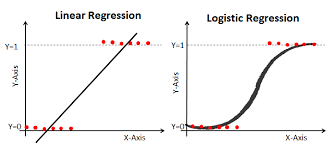

Logistic regression deals with probabilities of a value falling into one group or another and probability has two main functions-

1. It can never be greater than zero
2. It should always be positive

If we try and use linear regression for classification, we can fall into cases where the values are less than zero or greater than 1. Thus we need a function which can cap the values between 0 and 1 and keep it positive and thats where sigmoid function comes into use.  

We eventually land up with equation ln(p/(1-p)) = $\beta_{0}$ + $\beta_{1}$ * x

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as sm

## Importing data

In [5]:
train = pd.read_csv('train_titanic.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Null values

In [7]:
# Columns having null values
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#IMPORTANT
# Cabin has large number of missing values, so dropping it for now
train.drop('Cabin',axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# dropping all null values
train.dropna(inplace = True)

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


### Categorical variables

In [11]:
# here instead of keeping 'male'/'female' as values we convert it ino dummy value 0 & 1
sex = pd.get_dummies(train['Sex'])
sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [10]:
# Now since these 2 columns have complemented values, both aren't required... therefore we dropped the first column
sex = pd.get_dummies(train['Sex'],drop_first= True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [11]:
# Similarly for class column also
pclass = pd.get_dummies(train['Pclass'],drop_first= True)
pclass.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [12]:
# Similarly for Embarked data
embarked = pd.get_dummies(train['Embarked'],drop_first= True)
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [13]:
# After filtering the data, now we concat these parts to the orginal data set
train2 = pd.concat([train,sex,pclass,embarked],axis = 1)
train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,2,3,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


### Dropping few columns

In [14]:
# now we are dropping the useless data, which we have now in form of dummies
train3 = train2.drop(['Name','Sex','Embarked','Pclass','Ticket','PassengerId'],axis = 1)
train3.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


## Logistic regression model(All variables)

In [15]:
# here we are taking survived column as y variable and rest all the variables as x variable
x = train3.drop('Survived',axis =1)
y = train3['Survived']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(569, 9)
(143, 9)
(569,)
(143,)


In [17]:
#performing logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
predictions = logreg.predict(x_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86        93
           1       0.74      0.70      0.72        50

   micro avg       0.81      0.81      0.81       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.81      0.81      0.81       143



In [20]:
confusion_matrix(y_test,predictions)

array([[81, 12],
       [15, 35]], dtype=int64)

In [21]:
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,81,12,93
1,15,35,50
All,96,47,143


In [22]:
accuracy_score(y_test,predictions)

0.8111888111888111

In [23]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)
coefficients.columns = [['Variable','Coefficients']]
coefficients

,Variable,Coefficients
0,Age,-0.024969
1,SibSp,-0.226959
2,Parch,-0.067188
3,Fare,0.005401
4,male,-2.322870
5,2,-0.398804
6,3,-1.531957
7,Q,-0.265711
8,S,-0.236737


## (Optional)Logistic regression using statsmodels

Another package which we can use to run logistic regression. Gives an output similar to R logistic regression output.

In [24]:
logreg2 = sm.Logit(y_train,x_train)
result = logreg2.fit()

Optimization terminated successfully.
         Current function value: 0.504784
         Iterations 6


In [25]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: Survived         Pseudo R-squared: 0.257   
Date:               2019-08-31 18:03 AIC:              592.4444
No. Observations:   569              BIC:              631.5393
Df Model:           8                Log-Likelihood:   -287.22 
Df Residuals:       560              LL-Null:          -386.77 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
Age      0.0016     0.0063    0.2564   0.7977   -0.0108    0.0141
SibSp   -0.1491     0.1266   -1.1781   0.2388   -0.3972    0.0990
Parch   -0.0769     0.1282   -0.5995   0.5488   -0.3282    0.1744
Fare     0.0174     0.0037    4.6435   0.0000    0.0100    0.0247
male    -2.1119     0.2173   -9.7180   0.0000   -2.5379   -1.6860
2        0.6601     0.2932    2.2515   0.0244    0.0855    1.2347
3       -0.2148     0.2792   -0.7692   0.4418   -0.7620    0.3325
Q        0.2048     0.6036    0.3393   0.7344   -0.9783    1.3879
S        0.2816     0.2816    0.9998   0.3174   -0.2704    0.8335
===============================================================

"""

**Pseudo R-squared**

Equivalent to $R^{2}$ value in linear regression. Basically a measure of how good the model is. Varies from 0 to 1 and higher the better.

**Log-likelihood**

This is the maximized value of the log-likelihood function.

**LL-Null**

this is the result of the maximized log-likelihood function when only an intercept is included. 

**z-value**

similar to t-value in linear regression and calculated as coefficient/standard error.

**P>|z| or p-value**

used to select variables which have a relationship with y-variable. Can be used to check the null hypothesis against value of 0.05. If the p-value is less than 0.05, we can reject the null hypothesis and infer that the variable is significant i.e. all variables with a p-value less than 0.05 should be kept in the model. 